# Daten-Visualisierung (Korpussammlung)

Das vorliegende Jupyter-Notebook dient dazu, Statistiken zu den Korpus-Annotationen zu visualisieren.
Dieses Notebook ermöglicht es, mehrere Subkorpora (in der Form mehrerer XMI-Dateien) zu einem großen Korpus zusammenzufassen. Einzelne Subkorpora können ebenfalls hiermit analysiert werden, ein bisschen einfacher ist es aber mit dem Notebook analysis_notebook_single.

## Setup

Setup. Muss ausgeführt werden, wenn das Notebook in Colab ausgeführt wird.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!git clone https://github.com/maria-becker/Moralization/
%cd "/content/Moralization/Annotation Analysis Tools/data_analysis"

Die import-Statements müssen immer ausgeführt werden.

In [1]:
import sys
import annotation_stats_collection as astats
import label_analysis as la

sys.path.append("../_utils_")
import corpus_extraction as ce
import xmi_analysis_util as xau

Hier bitte eine Liste *file_list* erstellen, die die Dateipfade zu allen Korpusdateien enthält, die ihr analysieren wollt.
+ *Am einfachsten erhält man einen Dateipfad, indem man die Datei im Ordersystem rechtsklickt und dann -> 'Pfad kopieren' auswählt. Und unbedingt den Pfad in Anführungszeichen setzen und davor ein kleines "r"!*
+ *Wer sich ein bisschen auskennt, kann zum Erstellen der Liste auch das os-Modul benutzen, das aus diesem Grund oben importiert wurde.*

Bei der Erstellung des corpus-Objekts ist zu beachten, welche Sprache(n) in eurem Korpus vertreten sind. Ist es sowohl Deutsch als auch die Fremdsprachen, muss *"all"* angegeben werde, für nur Deutsch *"de"* und für andere Sprachkombinationen kann ein beliebiger anderer String übergeben werden (z.B. *"fremd"*).

In [ ]:
# Create a list by manually listing explicit files
file_list = [
    r"filepath1",
    r"filepath2",
    r"filepath3"
]
corpus = ce.CorpusCollection(file_list, language="fremd")

In [2]:
# Create a list via the list_xmis_in_directory() function
directory_path = '/home/bruno/Desktop/Databases/Moralization/Zeitungstexte'

file_list = xau.list_xmis_in_directory(directory_path)
corpus = ce.CorpusCollection(file_list, 'de')

Duplicate:  Moralisierung Kontext
Duplicate:  Moralisierung Kontext
Duplicate:  Moralisierung Weltwissen
Duplicate:  Moralisierung Kontext
Duplicate:  Moralisierung interpretativ
Duplicate:  Moralisierung explizit
Duplicate:  Moralisierung Weltwissen
Duplicate:  Moralisierung Kontext
Duplicate:  Moralisierung explizit
Duplicate:  Moralisierung explizit
Duplicate:  Moralisierung Weltwissen
Duplicate:  Moralisierung Weltwissen
Duplicate:  Moralisierung explizit
Duplicate:  Moralisierung Kontext
Duplicate:  Moralisierung Kontext
Duplicate:  Moralisierung Weltwissen
Duplicate:  Moralisierung Kontext
Duplicate:  Moralisierung Weltwissen
Duplicate:  Moralisierung Kontext
Duplicate:  Moralisierung explizit
Duplicate:  Moralisierung explizit
Duplicate:  Moralisierung Weltwissen
Duplicate:  Moralisierung Weltwissen
Duplicate:  Moralisierung explizit
Duplicate:  Moralisierung explizit
Duplicate:  Moralisierung explizit
Duplicate:  Moralisierung explizit
Duplicate:  Moralisierung explizit
Duplica

## Analyse 1: Frequenzen

Die folgende Funktion gibt an, **wie häufig es ist, dass ein Label n Mal in einer Moralisierung vergeben wird** (*Beispiel: Oft gibt es zwei Protagonisten in einer Moralisierung, aber nur selten sechs oder sieben.*).

+ Der erste Parameter ist das Korpus. Hier einfach *corpus* stehen lassen.
+ Der zweite Parameter - *label_type* - ist die Kategorie des Phänomens, von denen wir wissen wollen, wie oft sie in den Moralisierungen auftauchen. Verwendet werden können:
  + *obj_morals*: Alle Moralwerte, die keine subjektiven Ausdrücke sind
  + *subj_morals*: Moralwerte, die subjektive Ausdrücke sind
  + *all_morals*: Alle Moralwerte
  + *protagonists*: Alle Protagonisten-Token
  + *protagonists_doubles*: Alle Protagonisten-Rollen (Achtung: manche Protagonisten-Token werden dabei doppelt gezählt - nämlich, wenn sie mehrere Rollen haben)
  + *com_functions*: Kommunikative Funktionen
  + *expl_demands*: Explizite Forderungen
  + *impl_demands*: Implizite Forderungen
  + *all_demands*: Alle Forderungen
+ Der Parameter *plot* gibt an, ob die Daten als Tabelle (*False*) oder als Säulendiagramm (*True*) visualisiert werden sollen.
+ Der Parameter *export* (*True* oder *False*) gibt an, ob die Daten als csv-Datei im derzeitigen Verzeichnis abgelegt werden sollen.


In [ ]:
astats.freq_inside_spans_collection(corpus,
                                    label_type="all_morals",
                                    plot=True)

---

Die folgende Funktionen wertet die **Häufigkeiten verschiedener Label einer Kategorie** aus. Es gibt folgende Funktionen:
1. *moral_values_freq()* - Moralwerte
   + Hier ist zu beachten, welche Moralwerte *("all", "obj" oder "subj." ausgewertet werden sollen). Es wird mit dem Parameter *moral_type* weitergegeben.
   + *sum_dimensions* gibt an, ob MFT-Dimensionspaare (z.B. Care-Harm) zusammen (*True*) oder getrennt (*False*) ausgegeben werden sollen.
2. *protagonist_role_freq()* - Protagonisten-Rollen
3. *protagonist_group_freq()* - Protagonisten-Typen/Gruppen (Individuum, Institution usw.)
4. *protagonist_ownother_freq()* - Protagonisten-Gruppenzuschreibungen
5. *comfunction_freq()* - Kommunikative Funktionen
6. *demand_freq()* - Forderungstypen

Alle Funktionen haben folgende Parameter:
+ Der erste Parameter ist das Korpus. Hier einfach *corpus* stehen lassen.
+ Der vorletzte Parameter *plot* gibt an, ob die Daten als Tabelle (*False*) oder als Säulendiagramm (*True*) visualisiert werden sollen.
+ Der letzte Parameter *export* (*True* oder *False*) gibt an, ob die Daten als csv-Datei im derzeitigen Verzeichnis abgelegt werden sollen.


In [ ]:
astats.moral_values_freq_collection(corpus,
                                    moral_type="all",
                                    sum_dimensions=True,
                                    plot=True,
                                    export=False)

In [ ]:
astats.protagonist_role_freq_collection(corpus,
                                        plot=True,
                                        export=False)

In [ ]:
astats.protagonist_group_freq_collection(corpus,
                                         plot=True,
                                         export=False)

In [ ]:
astats.protagonist_ownother_freq_collection(corpus,
                                            plot=True,
                                            export=False)

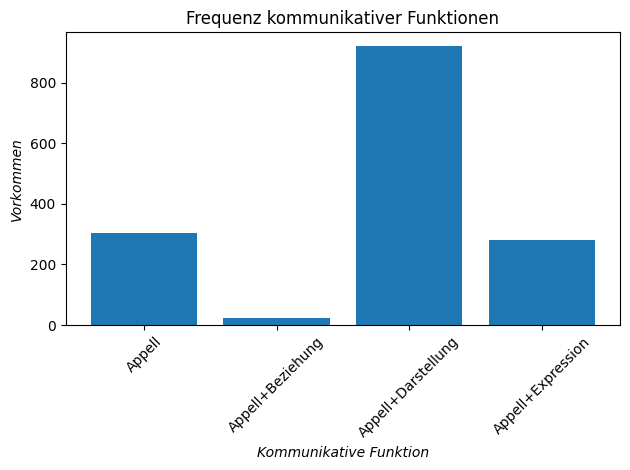

,Kommunikative Funktion,Vorkommen,"(7, Summe)",Anteil
0,Appell,305,1529,0.199477
4,Appell+Beziehung,24,1529,0.015697
5,Appell+Darstellung,920,1529,0.601700
6,Appell+Expression,280,1529,0.183126
7,Summe,0,1529,0.000000


In [3]:
astats.comfunction_freq_collection(corpus,
                                   plot=True,
                                   export=False)

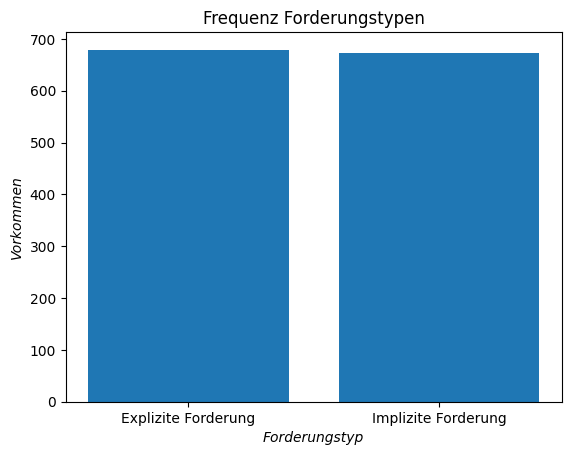

,Forderungstyp,Vorkommen
0,Explizite Forderung,679
1,Implizite Forderung,673
2,Summe,1352


In [4]:
astats.demand_freq_collection(corpus,
                              plot=True,
                              export=False)

## Analyse 1.5: Protagonisten-Zusammenhänge
Die Protagonisten-Kategorie ist interessant, weil für Protagonisten gleich mehrere Label vergeben werden. Mit folgenden Funktionen kann berechnet werden, wie diese zusammenhängen.

Drei Funktionen sind verfügbar:
1. *roles_and_groups()* - Zusammenhang zw. Rollen- und Gruppenlabel
2. *roles_and_ownother()* - Zusammenhang zw. Rollen- und Gruppenzugehörigkeitslabel
3. *groups_and_ownother()* - Zusammenhang zw. Gruppen- und Gruppenzugehörigkeitslabel

Alle Funktionen haben folgende Parameter:
+ Der erste Parameter ist das Korpus. Hier einfach *corpus* stehen lassen.
+ Der vorletzte Parameter *percent* gibt an, ob die Daten als Prozent der Spaltensumme (*True*) oder nicht (*False*) ausgegeben werden sollen.
+ Der letzte Parameter *export* (*True* oder *False*) gibt an, ob die Daten als csv-Datei im derzeitigen Verzeichnis abgelegt werden sollen.

In [7]:
astats.roles_and_groups_collection(corpus,
                                   relative=True,
                                   export=False)

,Kategorie,Adresassat:in,Benefizient:in,Forderer:in,Kein Bezug
0,Individuum,0.122128,0.048641,0.521186,0.167431
1,Institution,0.509069,0.261803,0.277542,0.350917
2,Menschen,0.139057,0.178827,0.074153,0.089450
3,soziale Gruppe,0.217654,0.477825,0.120763,0.376147
4,Sonstige,0.012092,0.032904,0.006356,0.016055


In [9]:
astats.roles_and_ownother_collection(corpus,
                                     relative=True,
                                     export=False)

,Kategorie,Own Group,Other Group,Neutral
0,Adresassat:in,0.207547,0.560284,0.350441
1,Benefizient:in,0.202156,0.141844,0.314152
2,Forderer:in,0.566038,0.021277,0.134266
3,Kein Bezug,0.024259,0.276596,0.201140


In [10]:
astats.groups_and_ownother_collection(corpus,
                                      relative=True,
                                      export=False)

,Kategorie,Own Group,Other Group,Neutral
0,Individuum,0.332432,0.122302,0.163202
1,Institution,0.256757,0.395683,0.383576
2,Menschen,0.272973,0.057554,0.106549
3,soziale Gruppe,0.127027,0.388489,0.329002
4,Sonstige,0.010811,0.035971,0.017672


## Analyse 2: Label-Kookkurenzen
Mit folgender Funktion kann ermittelt werden, ob manche Label überzufällig häufig mit anderen Label auftauchen.

Die Funktion *association_measure* berechnet PMI (pointwise mutual information) für die Label-Okkurenzen innerhalb von moralisierenden Spans.

Die Funktion *association_measure* hat folgende Parameter:
+ Der erste Parameter ist das Korpus. Hier einfach *corpus* stehen lassen.
+ Der zweite und der dritte Parameter sind die Label, deren Kookurrenzen innerhalb von Moralisierungen untersucht werden sollen. Folgende Label stehen zur Verfügung:
    + obj_morals
    + subj_morals
    + all_morals
    + prot_roles
    + prot_groups
    + prot_ownother
    + com_functions
    + demands
+ Der Parameter *significance* gibt an, ob zusätzlich zum PMI das statistische Signifikanzniveau der Verteilung (mittels Fischers Exaktem Text) berechnet werden soll.
+ Der letzte Parameter *export* (*True* oder *False*) gibt an, ob die Daten als csv-Datei im derzeitigen Verzeichnis abgelegt werden sollen.

In [17]:
astats.association_measure_collection(corpus,
                                      "com_functions",
                                      "demands",
                                      significance=True,
                                      export=False)

KeyError: {'Coordinates': (62148, 62469), 'Category': 'Expression'} -- Is the label inside a moralization?
KeyError: {'Coordinates': (122882, 123164), 'Category': 'Darstellung'} -- Is the label inside a moralization?
KeyError: {'Coordinates': (308449, 308518), 'Category': 'Darstellung'} -- Is the label inside a moralization?
KeyError: {'Coordinates': (558548, 558700), 'Category': 'Appell'} -- Is the label inside a moralization?
KeyError: {'Coordinates': (558548, 558700), 'Category': 'Expression'} -- Is the label inside a moralization?
KeyError: {'Coordinates': (638495, 638631), 'Category': 'Appell'} -- Is the label inside a moralization?
KeyError: {'Coordinates': (729829, 730060), 'Category': 'Expression'} -- Is the label inside a moralization?
KeyError: {'Coordinates': (62285, 62320), 'Category': 'explizit'} -- Is the label inside a moralization?
KeyError: {'Coordinates': (122882, 123164), 'Text': 'Die Politiker müssen auf die Belange der Bevölkerung eingehen.', 'Category': 'implizit'

implizit               explizit          
                   Significance       PMI Significance       PMI
Appell                      0.0 -0.532663          0.0  0.471853
Beziehung              0.834543  0.014254          1.0   0.00146
Darstellung                 0.0  0.299576          0.0 -0.214701
Expression                  1.0  0.000122     0.207309  0.032502
Appell+Beziehung            1.0      -inf          1.0      -inf
Appell+Darstellung          1.0      -inf          1.0      -inf
Appell+Expression           1.0      -inf          1.0      -inf